In [1]:
# Load libraries 
import numpy as np           
import pandas as pd                       
import seaborn as sns              
import matplotlib.pyplot as plt                         

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
# load the data 
data = pd.read_pickle("../src/cleaned_df.pkl")
data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.1,18.7,181.0,3750.0
1,0,2,39.5,17.4,186.0,3800.0
2,0,2,40.3,18.0,195.0,3250.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 16.3 KB


In [11]:
# Define X for the Model 
scaler = StandardScaler()
X = data.copy()
X_cleaned = X.iloc[:,2:]
X_cleaned = scaler.fit_transform(X_cleaned.values)

# apply pca to transformed data 
ncomp = 3
pca = PCA(n_components=ncomp)
model = pca.fit_transform(X_cleaned)


pca_data = pd.DataFrame(model, columns=["PC1", "PC2", "PC3"])

In [14]:
data = data.reset_index(drop=True)
pca_data = pca_data.reset_index(drop=True)

data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.1,18.7,181.0,3750.0
1,0,2,39.5,17.4,186.0,3800.0
2,0,2,40.3,18.0,195.0,3250.0


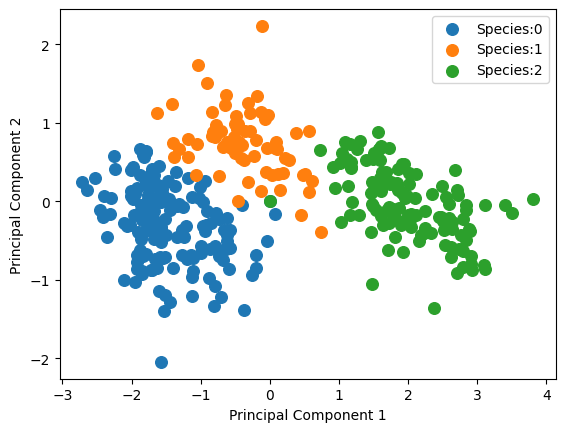

In [20]:
data = data.reset_index()
pca_data = pca_data.reset_index()

for specie in data["species"].unique():
    subset_df = pca_data[data["species"] == specie]
    plt.scatter(subset_df["PC1"], subset_df["PC3"],
                label=f"Species:{specie}",
                s=70)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
